### About Dataset


A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

Content
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("marketing_campaign.xlsx")

### Analysis stratagies
- age group v.s each cmp
- Marital v.s each cmp
- kidhome v.s each cmp
- techhome v.s each cmp
- education v.s each cmp
- income group v.s each cmp
- mnt group by .corr() => and v.s each cmp
- nsp v.s each cmp; nwp v.s each cmp 

- 看哪個cmp對於desicion最有利，再看哪個族群適合那個cmp

In [42]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeGroup,total_daily_consumption,Age,AgeGroup,AgeGroup_lable
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,well_off,894,67,Senior,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,normal,10,70,Senior,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,wealthy,308,59,Adult,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,poor,37,40,Adult,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,well_off,234,43,Adult,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       2240 non-null   int64   
 1   Year_Birth               2240 non-null   int64   
 2   Education                2240 non-null   object  
 3   Marital_Status           2240 non-null   object  
 4   Income                   2216 non-null   float64 
 5   Kidhome                  2240 non-null   int64   
 6   Teenhome                 2240 non-null   int64   
 7   Dt_Customer              2240 non-null   object  
 8   Recency                  2240 non-null   int64   
 9   MntWines                 2240 non-null   int64   
 10  MntFruits                2240 non-null   int64   
 11  MntMeatProducts          2240 non-null   int64   
 12  MntFishProducts          2240 non-null   int64   
 13  MntSweetProducts         2240 non-null   int64   
 14  MntGoldP

- missing values in the Income variable

In [70]:
missing_value = pd.DataFrame()
missing_value["Num_missing"] = df.isnull().sum()
missing_value["%_missing"] = np.round(100*missing_value['Num_missing']/len(df),2)
missing_value

,Num_missing,%_missing
ID,0,0.00
Year_Birth,0,0.00
Education,0,0.00
Marital_Status,0,0.00
Income,24,1.07
Kidhome,0,0.00
Teenhome,0,0.00
Dt_Customer,0,0.00
Recency,0,0.00
MntWines,0,0.00


In [71]:
df.dropna(inplace=True)

- missing value lower than 2% -> eliminate

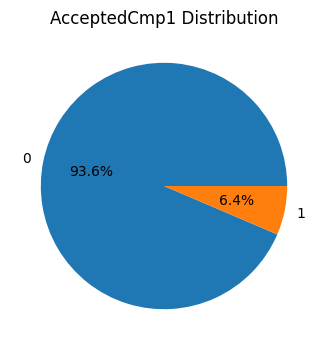

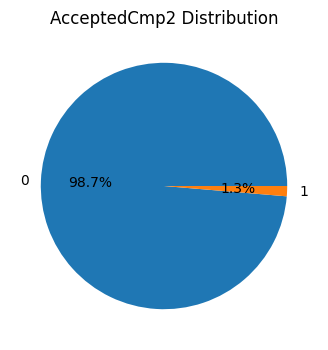

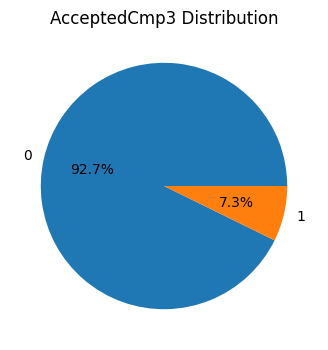

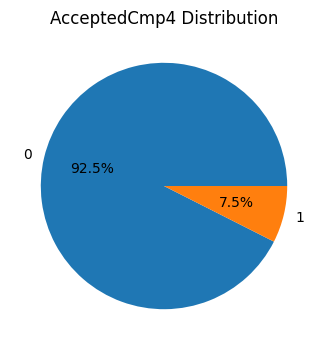

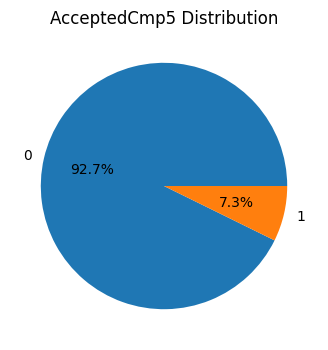

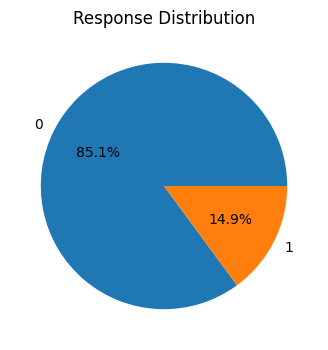

In [5]:
# see the situation of each cmp
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for col in campaign_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} Distribution')
    plt.ylabel('')
    plt.show()




### age group v.s each cmp

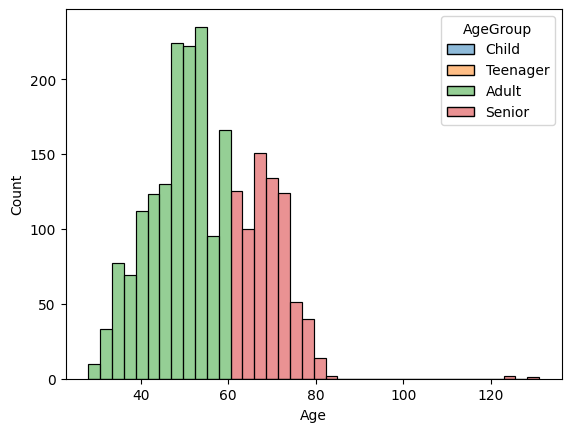

<Axes: title={'center': 'Age group persentage'}, ylabel='count'>

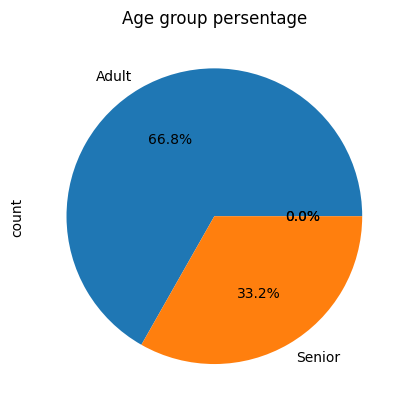

In [49]:
#caculate the age
df["Age"] = 2024 - df["Year_Birth"]
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior']) #np.inf 表示無限大
sns.histplot(data=df, x="Age", hue="AgeGroup")
plt.show()

plt.figure()
df["AgeGroup"].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Age group persentage")

C:\Users\User\AppData\Local\Temp\ipykernel_12168\3039063130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_cmp_sum = df.groupby('AgeGroup').agg(


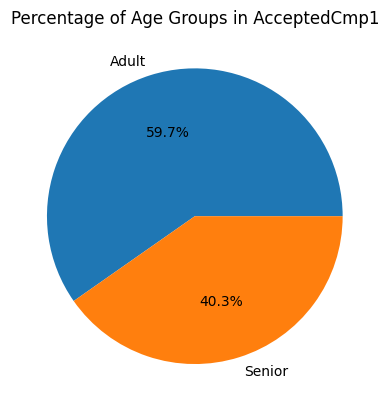

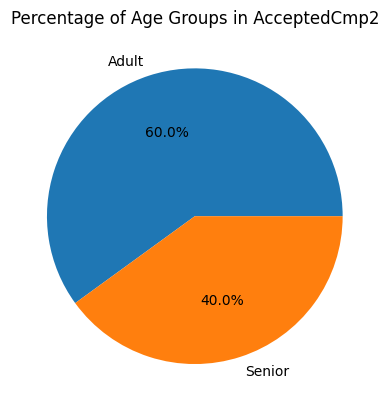

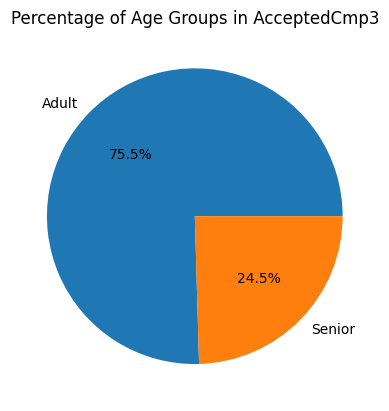

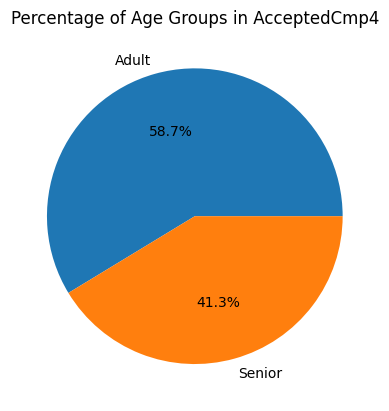

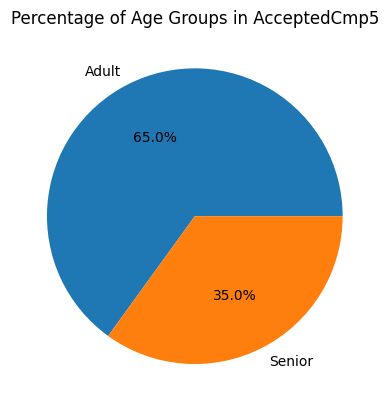

In [26]:
#caculate the % of each agegroup in each cmp
df_age_cmp_sum = df.groupby('AgeGroup').agg(
    AcceptedCmp1=('AcceptedCmp1', 'sum'),
    AcceptedCmp2=('AcceptedCmp2', 'sum'),
    AcceptedCmp3=('AcceptedCmp3', 'sum'),
    AcceptedCmp4=('AcceptedCmp4', 'sum'),
    AcceptedCmp5=('AcceptedCmp5', 'sum')
)

total_accepted = df_age_cmp_sum.sum(axis=0)

df_age_cmp_percentage = (df_age_cmp_sum.div(total_accepted) * 100).stack().reset_index()
df_age_cmp_percentage.columns = ['AgeGroup', 'AcceptedCmp', 'Percentage']

df_age_cmp_percentage = df_age_cmp_percentage.loc[~df_age_cmp_percentage['AgeGroup'].isin(["Child", "Teenager"])]
grouped = df_age_cmp_percentage.groupby('AcceptedCmp')

for accepted_cmp, group in grouped:
    
    age_groups = group['AgeGroup']
    percentages = group['Percentage']
    
    plt.figure()
    plt.pie(percentages, labels=age_groups, autopct='%1.1f%%')
    plt.title(f'Percentage of Age Groups in {accepted_cmp}')
    plt.show()

insights
- only adult and senior in this dataset
- More adult than senior
- cmp3 is more effective for adult(75.4%)



### Marital v.s each cmp

<Axes: title={'center': 'Marital Status'}, ylabel='count'>

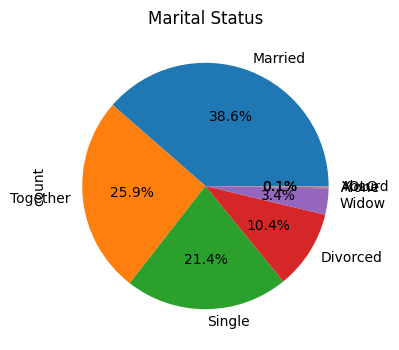

In [51]:
plt.figure(figsize=(6, 4))
df["Marital_Status"].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Marital Status")

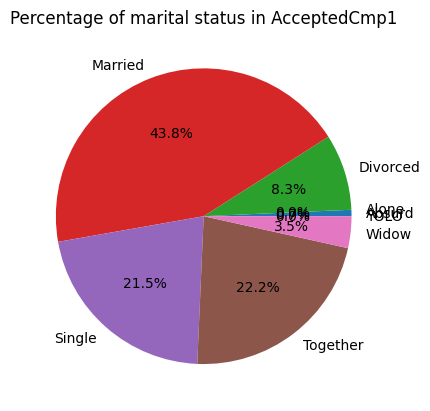

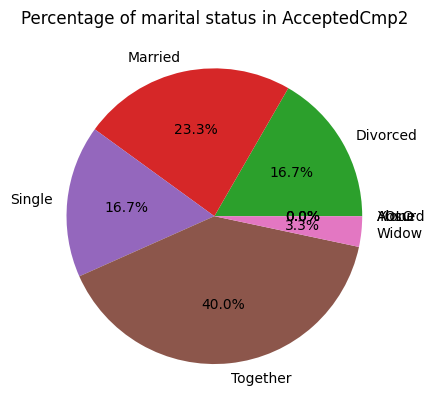

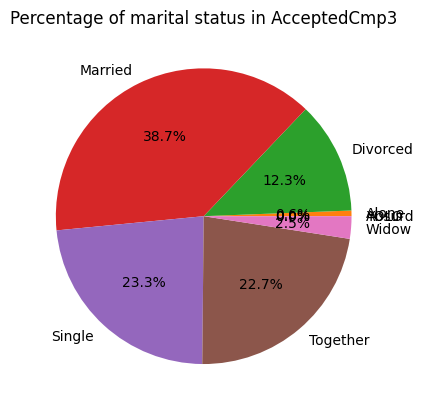

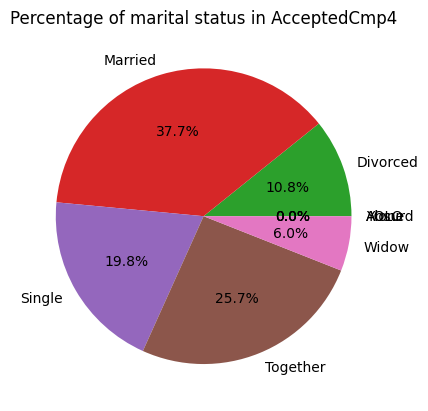

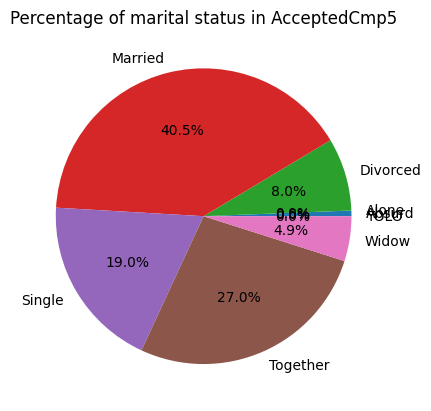

In [52]:
#caculate the % of Marital Status in each cmp
df_marital_cmp_sum = df.groupby('Marital_Status').agg(
    AcceptedCmp1=('AcceptedCmp1', 'sum'),
    AcceptedCmp2=('AcceptedCmp2', 'sum'),
    AcceptedCmp3=('AcceptedCmp3', 'sum'),
    AcceptedCmp4=('AcceptedCmp4', 'sum'),
    AcceptedCmp5=('AcceptedCmp5', 'sum')
)

total_accepted = df_marital_cmp_sum.sum(axis=0)

# 计算每个营销活动中，每个年龄组所占的比例
df_marital_cmp_percentage = (df_marital_cmp_sum.div(total_accepted) * 100).stack().reset_index()
df_marital_cmp_percentage.columns = ['Marital_Status', 'AcceptedCmp', 'Percentage']

grouped = df_marital_cmp_percentage.groupby('AcceptedCmp')

for accepted_cmp, group in grouped:
    
    marital_groups = group['Marital_Status']
    percentages = group['Percentage']
    
    plt.figure()
    plt.pie(percentages, labels=marital_groups, autopct='%1.1f%%')
    plt.title(f'Percentage of marital status in {accepted_cmp}')
    plt.show()

- cmp2 is especially effective for together people (40%)

### kidhome v.s each cmp

<Axes: title={'center': 'Number of kids'}, ylabel='count'>

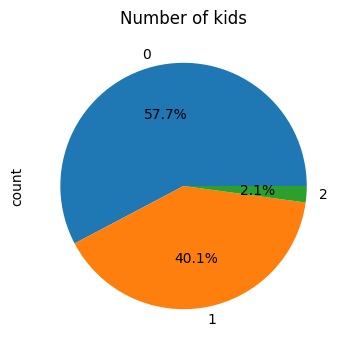

In [25]:
plt.figure(figsize=(6, 4))
df["Kidhome"].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Number of kids")

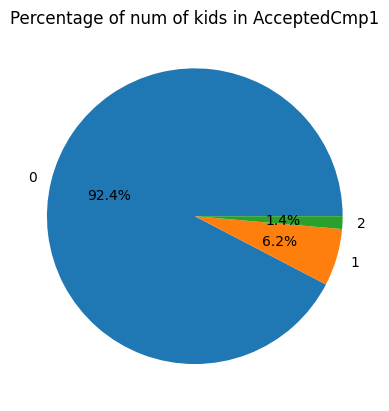

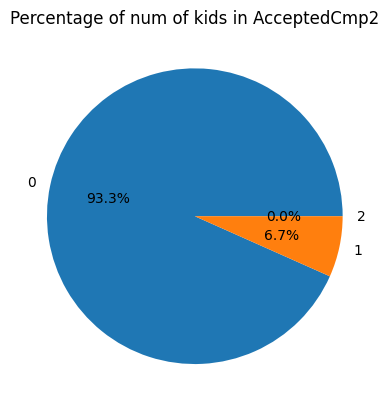

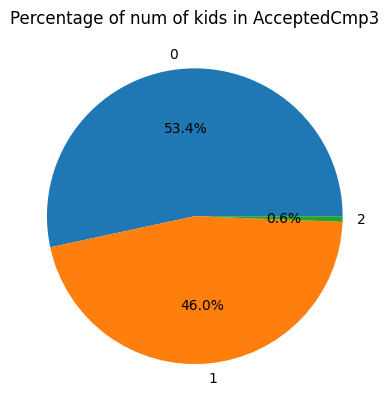

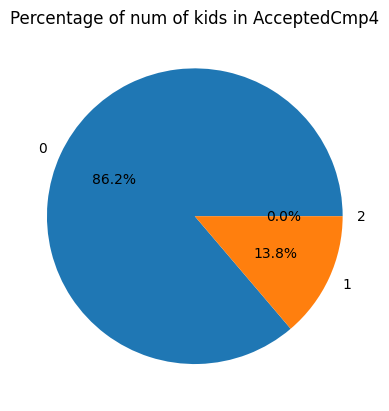

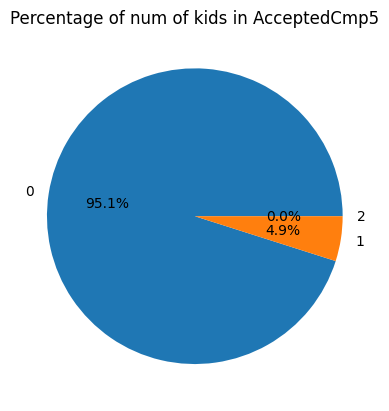

In [29]:
#caculate the % of each number of kids in each cmp
df_kid_cmp_sum = df.groupby('Kidhome').agg(
    AcceptedCmp1=('AcceptedCmp1', 'sum'),
    AcceptedCmp2=('AcceptedCmp2', 'sum'),
    AcceptedCmp3=('AcceptedCmp3', 'sum'),
    AcceptedCmp4=('AcceptedCmp4', 'sum'),
    AcceptedCmp5=('AcceptedCmp5', 'sum')
)

total_accepted = df_kid_cmp_sum.sum(axis=0)

# 计算每个营销活动中，每个年龄组所占的比例
df_kid_cmp_percentage = (df_kid_cmp_sum.div(total_accepted) * 100).stack().reset_index()
df_kid_cmp_percentage.columns = ['kidhome', 'AcceptedCmp', 'Percentage']

grouped = df_kid_cmp_percentage.groupby('AcceptedCmp')

for accepted_cmp, group in grouped:
    
    kid_groups = group['kidhome']
    percentages = group['Percentage']
    
    plt.figure()
    plt.pie(percentages, labels=kid_groups, autopct='%1.1f%%')
    plt.title(f'Percentage of num of kids in {accepted_cmp}')
    plt.show()

- 57.7% people have no kid, 40% people have one kid, prople barly have two kids
- In most of the cmp people have no kid is the majority, but cmp3 is especially attractive to people have kids (46.6%)
- cmp5, cmp1, cmp2 is especially effective for people without kids

### teenhome v.s each cmp

<Axes: title={'center': 'Number of teens'}, ylabel='count'>

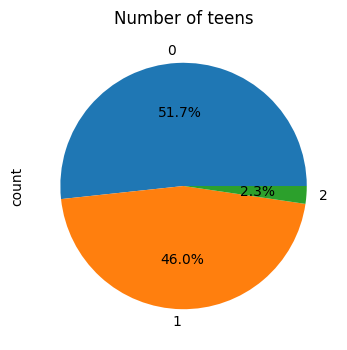

In [30]:
plt.figure(figsize=(6, 4))
df["Teenhome"].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Number of teens")

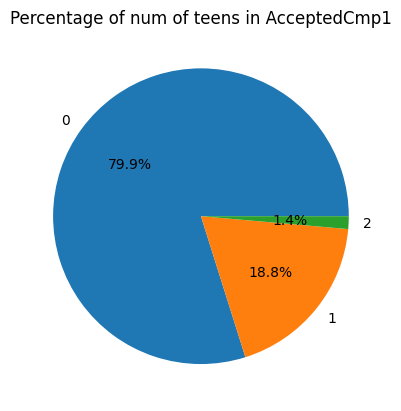

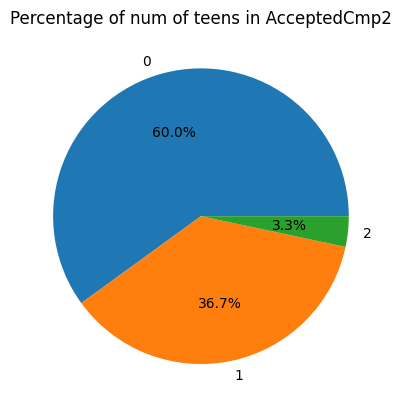

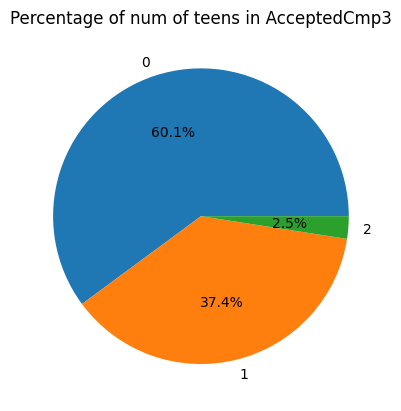

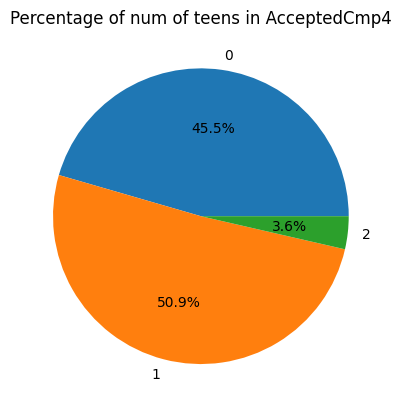

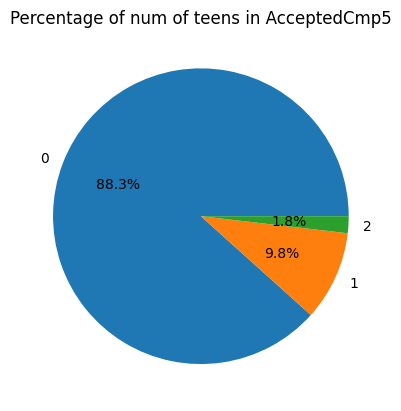

In [32]:
#caculate the % of each number of teens in each cmp
df_teen_cmp_sum = df.groupby('Teenhome').agg(
    AcceptedCmp1=('AcceptedCmp1', 'sum'),
    AcceptedCmp2=('AcceptedCmp2', 'sum'),
    AcceptedCmp3=('AcceptedCmp3', 'sum'),
    AcceptedCmp4=('AcceptedCmp4', 'sum'),
    AcceptedCmp5=('AcceptedCmp5', 'sum')
)

total_accepted = df_teen_cmp_sum.sum(axis=0)

# 计算每个营销活动中，每个年龄组所占的比例
df_teen_cmp_percentage = (df_teen_cmp_sum.div(total_accepted) * 100).stack().reset_index()
df_teen_cmp_percentage.columns = ['Teenhome', 'AcceptedCmp', 'Percentage']

grouped = df_teen_cmp_percentage.groupby('AcceptedCmp')

for accepted_cmp, group in grouped:
    
    teen_groups = group['Teenhome']
    percentages = group['Percentage']
    
    plt.figure()
    plt.pie(percentages, labels=teen_groups, autopct='%1.1f%%')
    plt.title(f'Percentage of num of teens in {accepted_cmp}')
    plt.show()

- around half people have 0 teen in their home and half people have 1 teen in their home, barely people have two teens in their home
- cmp1 and cmp5 are especially effective for people have no teens in their home (80% and 88.3%)
- cmp4 is especially effective for people have 1 teen in their house

### education v.s each cmp

<Axes: title={'center': 'Education level'}, ylabel='count'>

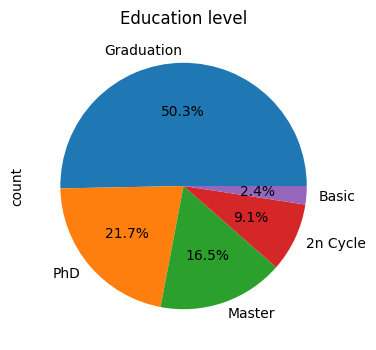

In [43]:
plt.figure(figsize=(6, 4))
df["Education"].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Education level")

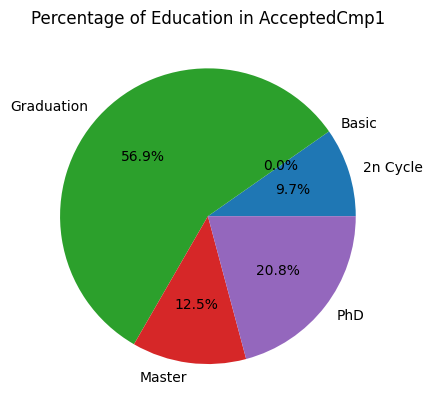

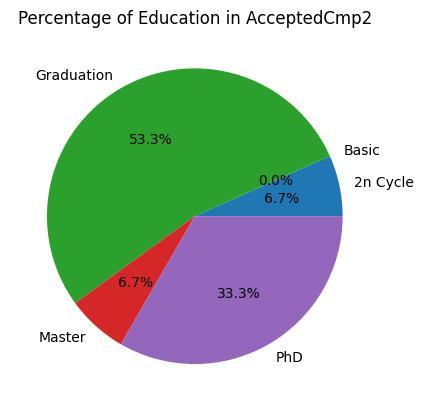

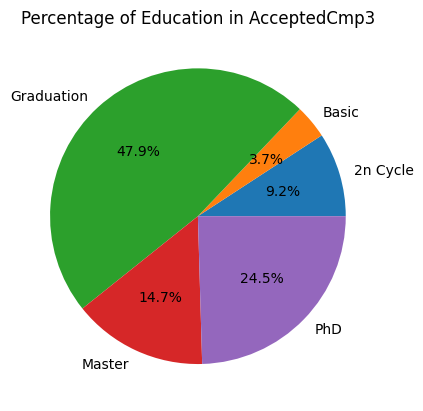

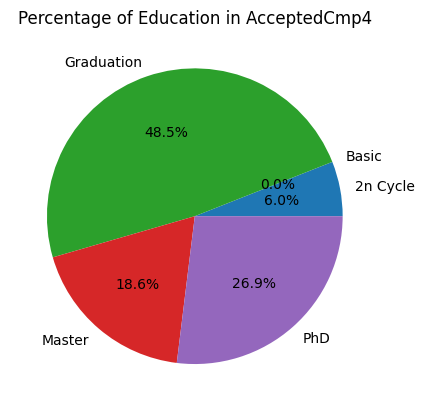

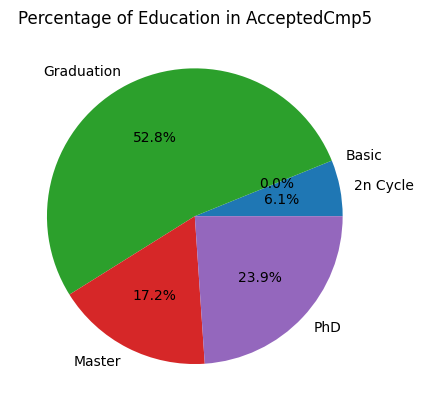

In [44]:
#caculate the % of each education level in each cmp
df_education_cmp_sum = df.groupby('Education').agg(
    AcceptedCmp1=('AcceptedCmp1', 'sum'),
    AcceptedCmp2=('AcceptedCmp2', 'sum'),
    AcceptedCmp3=('AcceptedCmp3', 'sum'),
    AcceptedCmp4=('AcceptedCmp4', 'sum'),
    AcceptedCmp5=('AcceptedCmp5', 'sum')
)

total_accepted = df_education_cmp_sum.sum(axis=0)

# 计算每个营销活动中，每个年龄组所占的比例
df_education_cmp_percentage = (df_education_cmp_sum.div(total_accepted) * 100).stack().reset_index()
df_education_cmp_percentage.columns = ['Education', 'AcceptedCmp', 'Percentage']

grouped = df_education_cmp_percentage.groupby('AcceptedCmp')

for accepted_cmp, group in grouped:
    
    education_groups = group['Education']
    percentages = group['Percentage']
    
    plt.figure()
    plt.pie(percentages, labels=education_groups, autopct='%1.1f%%')
    plt.title(f'Percentage of Education in {accepted_cmp}')
    plt.show()

- graduation are the majority(50.3%), PhD is the second(21.7%), Master is the third(16.5%) 
- cmp2 is more attractive for PhD than others.

### income group v.s each cmp

<Axes: xlabel='Income', ylabel='Count'>

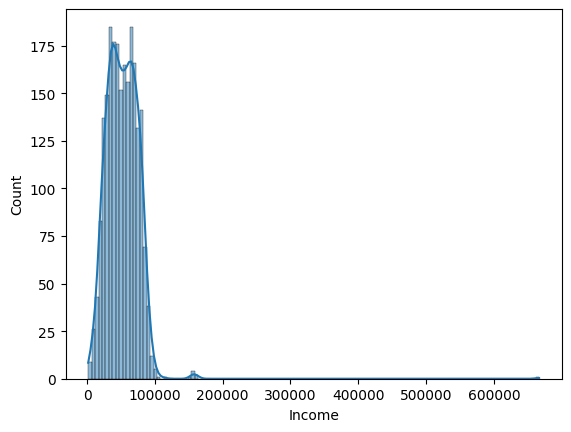

In [45]:
sns.histplot(data=df, x=df["Income"], kde=True)

In [46]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: ylabel='Income'>

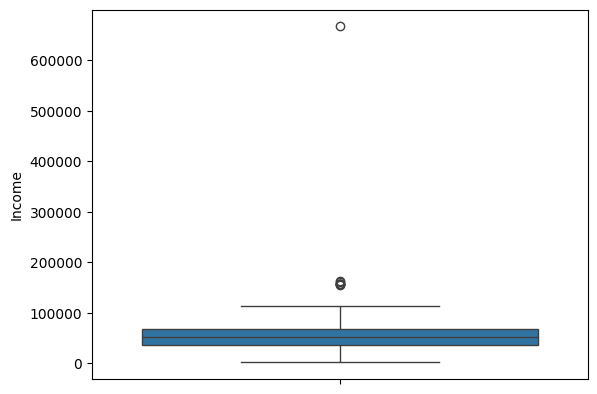

In [47]:
sns.boxplot(data=df, y=df["Income"])

In [22]:
#handling outlier
seventy_fifth = df["Income"].quantile(0.75)
twenty_fifth = df["Income"].quantile(0.25)
iqr = seventy_fifth - twenty_fifth

#thresshoulds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

#eliminate outlier
df_no_outlier = df[(df["Income"] > lower) & (df["Income"] < upper)]
print(df_no_outlier["Income"].describe())
#print(df["Income"].describe())


count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64


In [27]:
df['IncomeGroup'] = pd.cut(df['Income'], bins=[0, 35196, 51301, 68289, np.inf], labels=['poor', 'normal', 'well_off', 'wealthy'])
df_no_outlier['IncomeGroup'] = pd.cut(df['Income'], bins=[0, 35196, 51301, 68289, np.inf], labels=['poor', 'normal', 'well_off', 'wealthy'])

C:\Users\User\AppData\Local\Temp\ipykernel_26492\2045031513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['IncomeGroup'] = pd.cut(df['Income'], bins=[0, 35196, 51301, 68289, np.inf], labels=['poor', 'normal', 'well_off', 'wealthy'])


C:\Users\User\AppData\Local\Temp\ipykernel_26492\980843812.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_income_cmp_sum = df.groupby('IncomeGroup').agg(


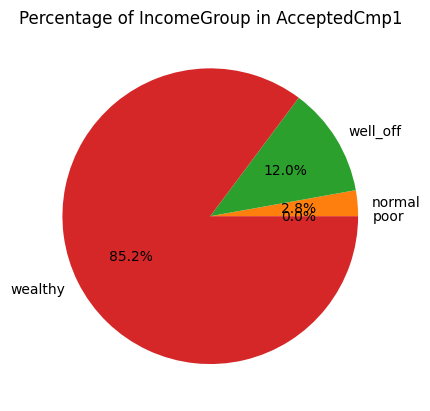

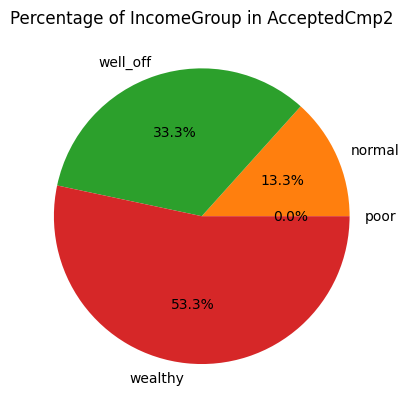

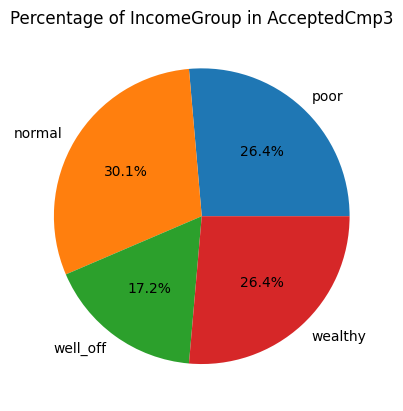

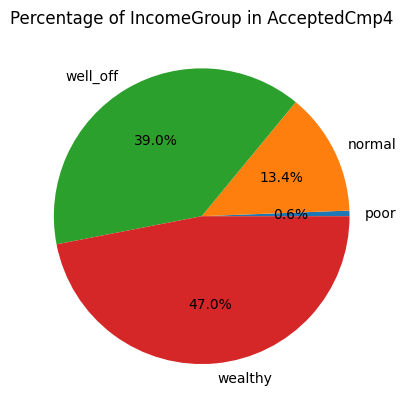

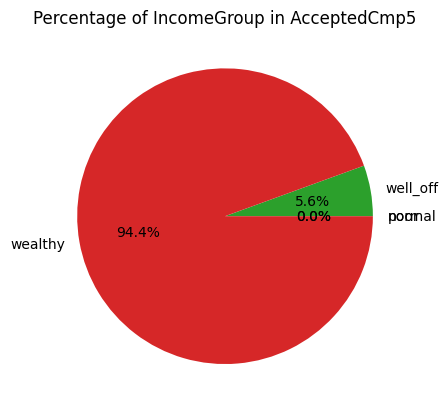

In [24]:
#caculate the % of each income level in each cmp
df_income_cmp_sum = df.groupby('IncomeGroup').agg(
    AcceptedCmp1=('AcceptedCmp1', 'sum'),
    AcceptedCmp2=('AcceptedCmp2', 'sum'),
    AcceptedCmp3=('AcceptedCmp3', 'sum'),
    AcceptedCmp4=('AcceptedCmp4', 'sum'),
    AcceptedCmp5=('AcceptedCmp5', 'sum')
)

total_accepted = df_income_cmp_sum.sum(axis=0)

# 计算每个营销活动中，每个年龄组所占的比例
df_income_cmp_percentage = (df_income_cmp_sum.div(total_accepted) * 100).stack().reset_index()
df_income_cmp_percentage.columns = ['IncomeGroup', 'AcceptedCmp', 'Percentage']

grouped = df_income_cmp_percentage.groupby('AcceptedCmp')

for accepted_cmp, group in grouped:
    
    income_groups = group['IncomeGroup']
    percentages = group['Percentage']
    
    plt.figure()
    plt.pie(percentages, labels=income_groups, autopct='%1.1f%%')
    plt.title(f'Percentage of IncomeGroup in {accepted_cmp}')
    plt.show()

- Most cmps are comparetively effective for richer people (well-off and wealthy), except for cmp3
- cmp2 is effective to wealthy people and little well-off people, barely work for people belong to lower income class
- cmp3 is close to equally effective to four income class, but it's the most effective cmp for lower income class compare to other cmps
- the ditribution of income level is close between cmp2 and cmp4
- cmp5 is super effective to wealthy people(94%), and not useful at all to people in lower income class

### mnt 按 .corr()分類 => 再 v.s each cmp

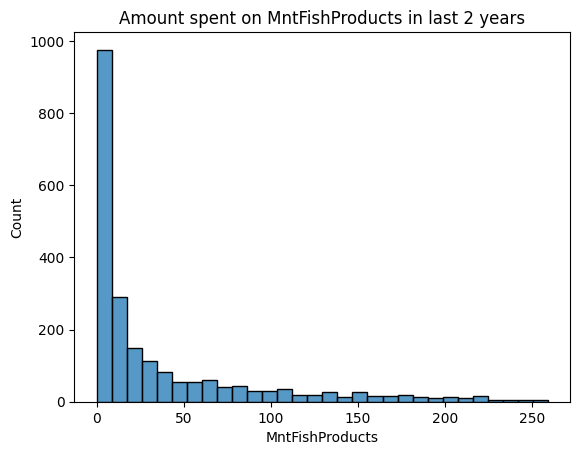

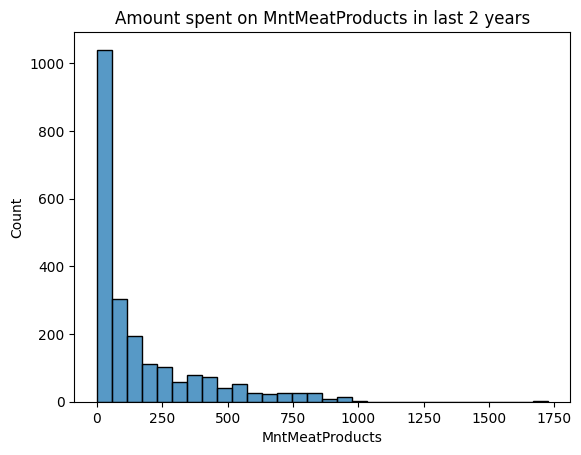

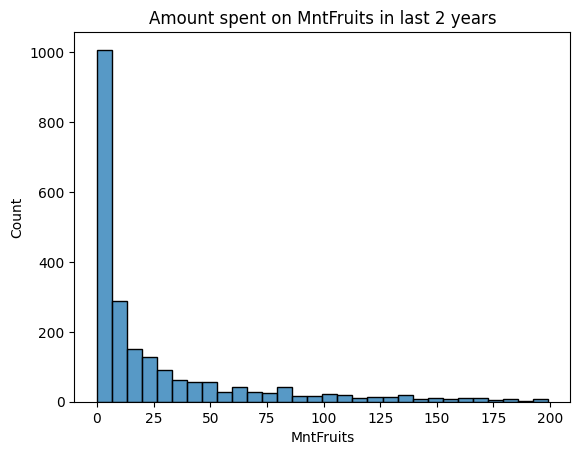

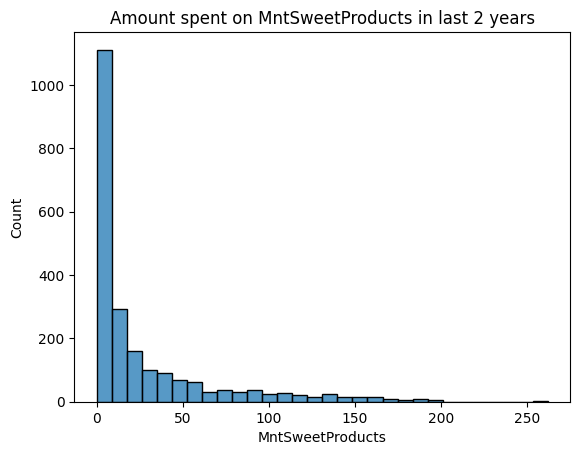

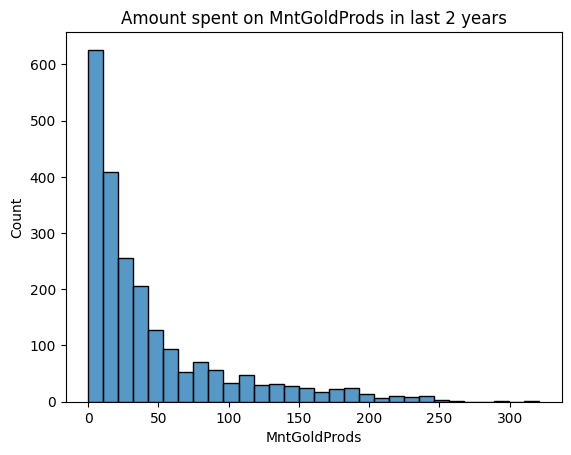

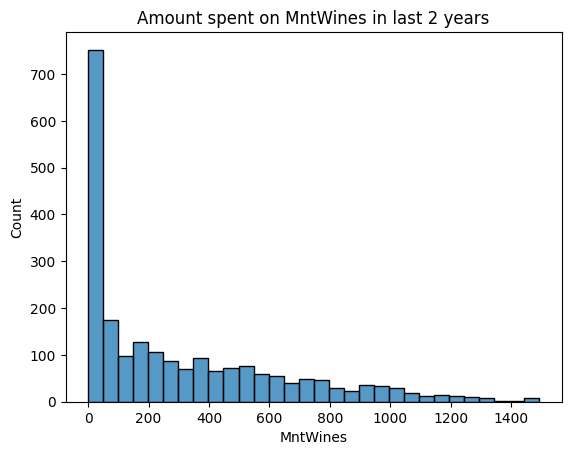

In [25]:
df_mnt = ["MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntGoldProds", "MntWines"]
for product in df_mnt:
    plt.figure()
    sns.histplot(data=df_no_outlier, x=product, bins=30)
    plt.title(f'Amount spent on {product} in last 2 years')
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

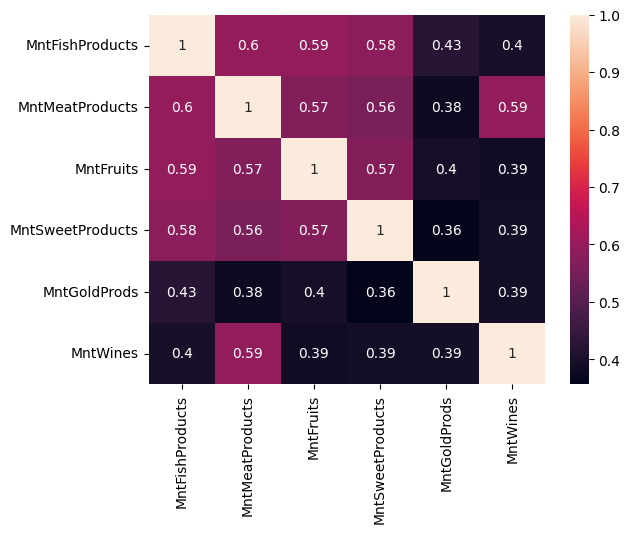

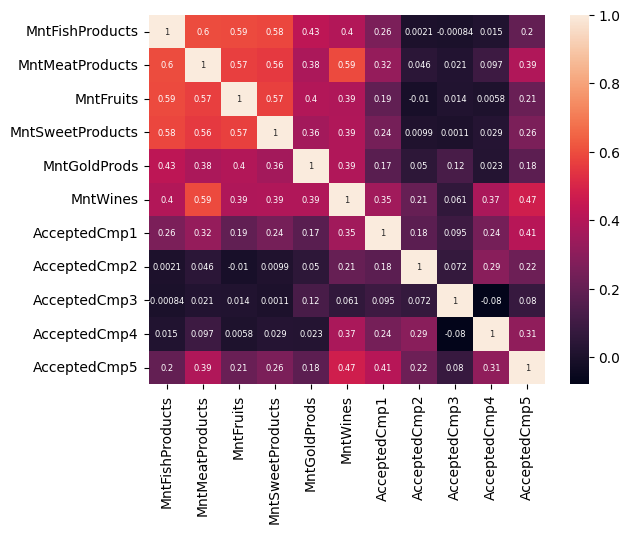

In [26]:
plt.figure()
sns.heatmap(df_no_outlier[["MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntGoldProds", "MntWines"]].corr(), annot=True, annot_kws={"fontsize": 10})
plt.show
plt.figure()
sns.heatmap(df_no_outlier[["MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntGoldProds", "MntWines", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 6})
plt.show

C:\Users\User\AppData\Local\Temp\ipykernel_26492\1502957172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier["total_daily_consumption"] = df_no_outlier["MntFishProducts"] + df_no_outlier["MntFruits"] + df_no_outlier["MntMeatProducts"] + df_no_outlier["MntSweetProducts"]


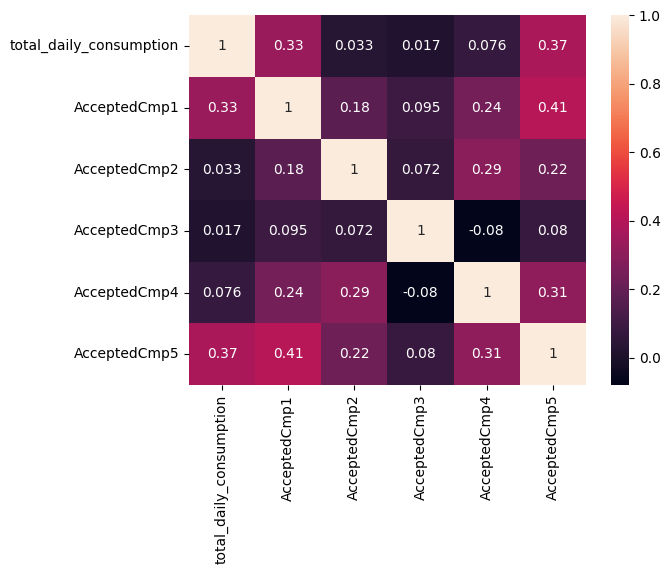

In [28]:
df["total_daily_consumption"] = df["MntFishProducts"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntSweetProducts"]
df_no_outlier["total_daily_consumption"] = df_no_outlier["MntFishProducts"] + df_no_outlier["MntFruits"] + df_no_outlier["MntMeatProducts"] + df_no_outlier["MntSweetProducts"]
plt.figure()
sns.heatmap(df_no_outlier[["total_daily_consumption", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})
plt.show()

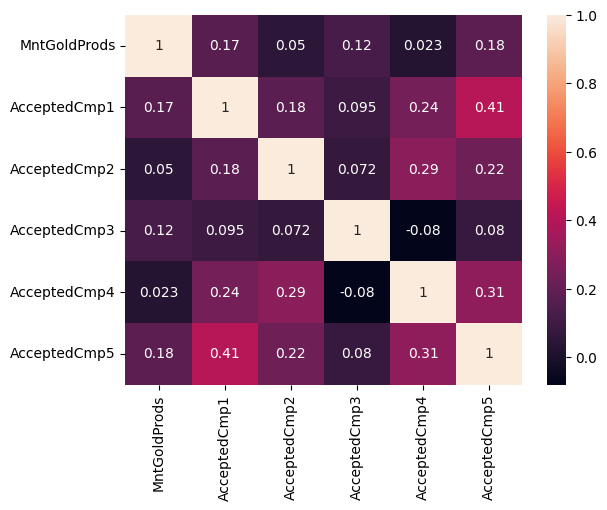

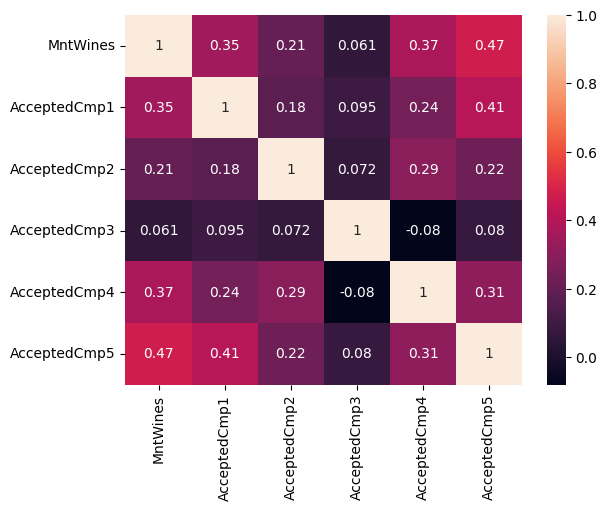

In [29]:
plt.figure()
sns.heatmap(df_no_outlier[["MntGoldProds", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})
plt.show()
plt.figure()
sns.heatmap(df_no_outlier[["MntWines", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})
plt.show()

- the correlation among daily consumption products(fish, meat, fruit, sweetproduct) are not bad(0.5-0.6) 
- the correlation among daily consumption products, wine, and gold are low(< 0.4)
- the correlation between wine and gold are also low(< 0.4)
- the correlation among daily consumption products and 5 cmps are low(< 0.4)
- the correlation among gold and 5 cmps are low(< 0.4)
- the correlation among wine and 5 cmps are low, only cmp5 has a little higher correlation(0.47)


### num_purchase v.s each cmp

<Axes: >

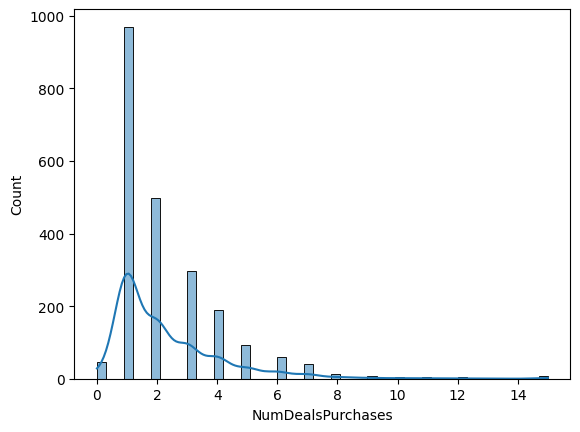

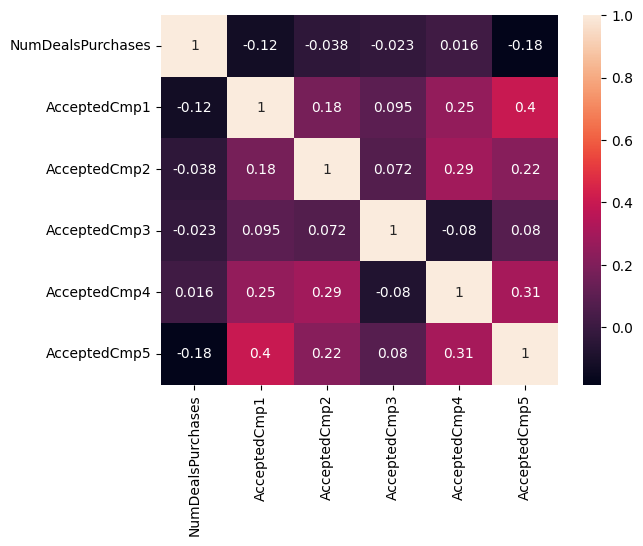

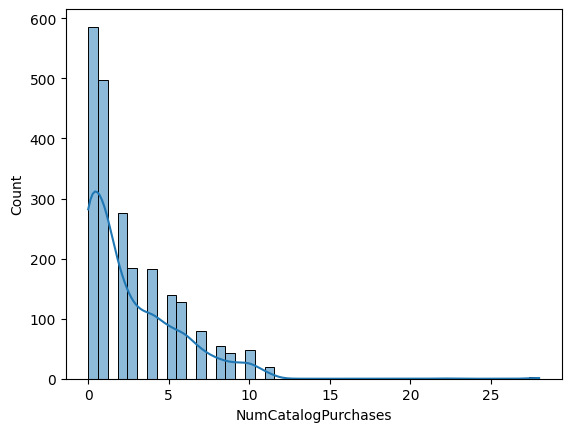

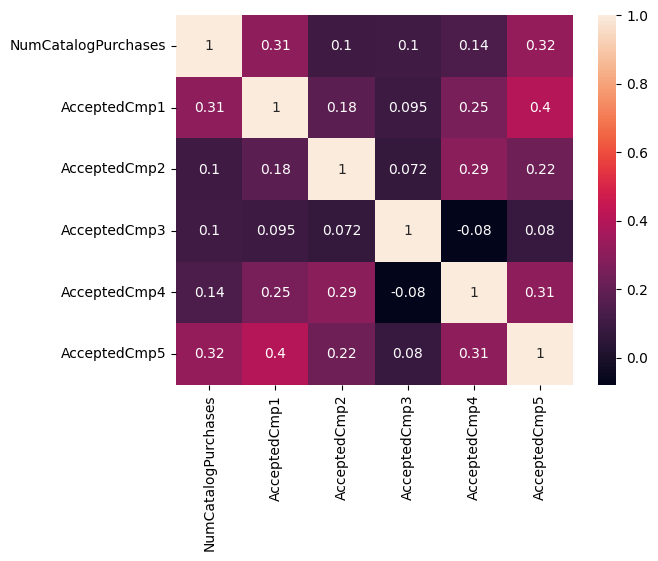

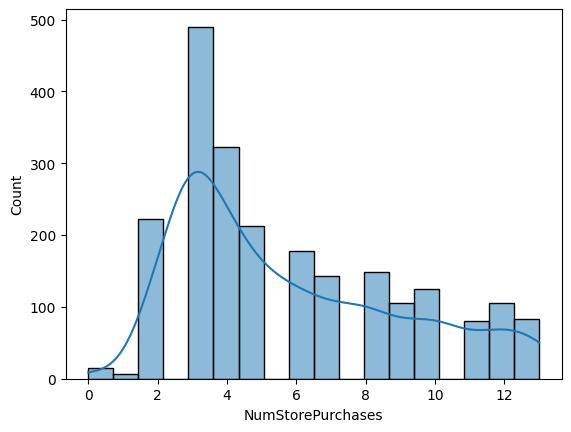

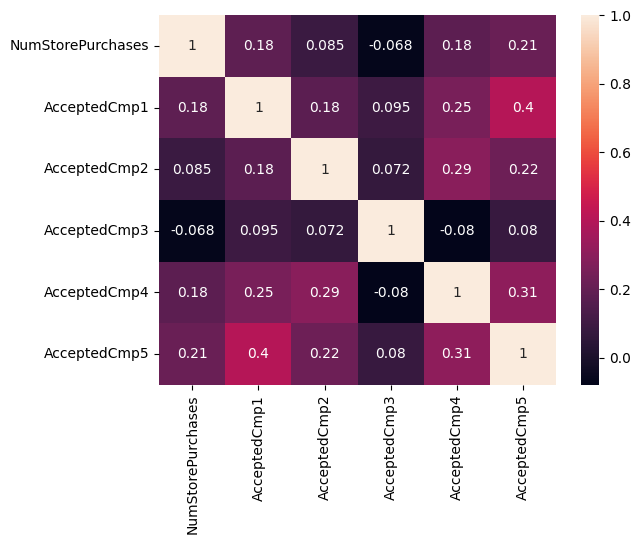

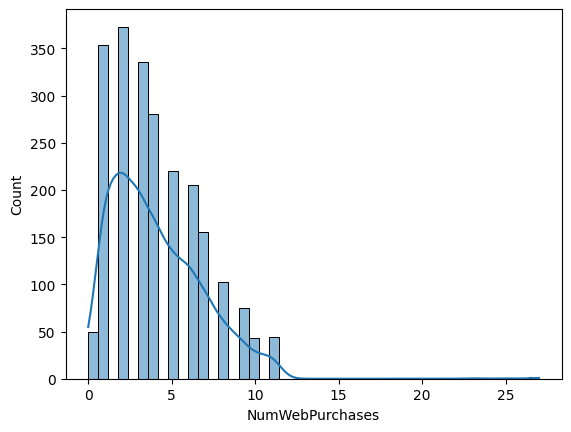

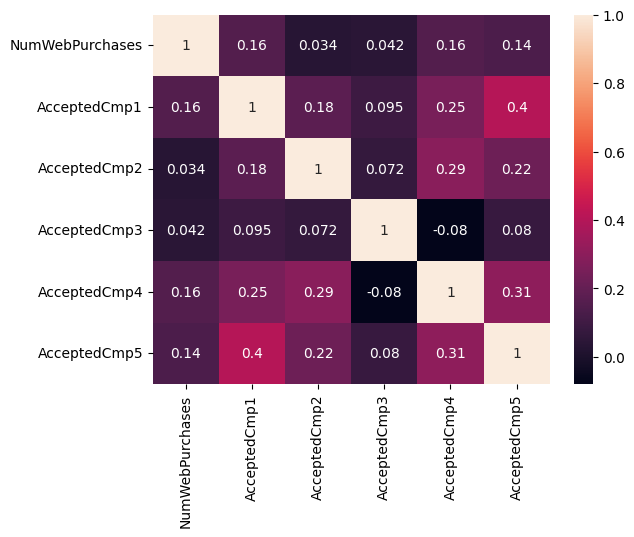

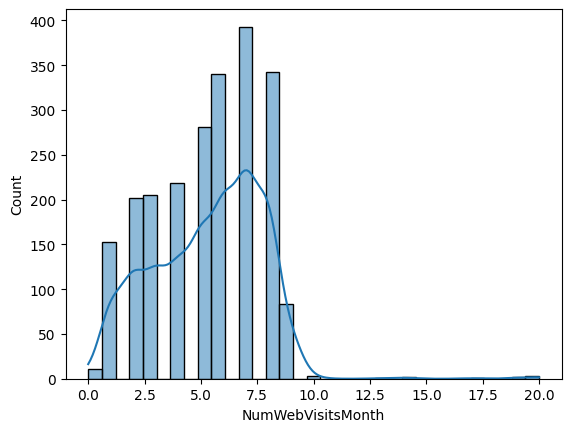

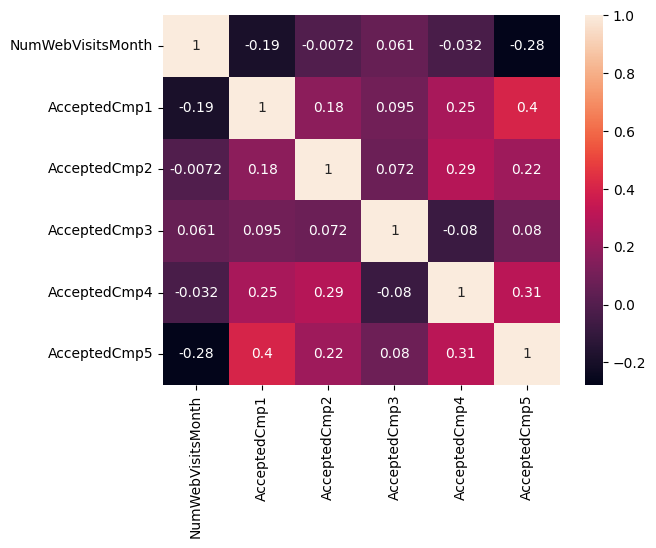

In [122]:
#NumDealsPurchases
plt.figure()
sns.histplot(data=df, x="NumDealsPurchases", kde=True)
plt.figure()
sns.heatmap(df[["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})


#NumCatalogPurchases
plt.figure()
sns.histplot(data=df, x="NumCatalogPurchases", kde=True)
plt.figure()
sns.heatmap(df[["NumCatalogPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})

#NumStorePurchases
plt.figure()
sns.histplot(data=df, x="NumStorePurchases", kde=True)
plt.figure()
sns.heatmap(df[["NumStorePurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})

#NumWebPurchases
plt.figure()
sns.histplot(data=df, x="NumWebPurchases", kde=True)
plt.figure()
sns.heatmap(df[["NumWebPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})

#NumWebVisitsMonth
plt.figure()
sns.histplot(data=df, x="NumWebVisitsMonth", kde=True)
plt.figure()
sns.heatmap(df[["NumWebVisitsMonth", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].corr(), annot=True, annot_kws={"fontsize": 10})

In [57]:
pd.set_option('display.max_columns', None)
df_no_outlier.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeGroup,total_daily_consumption,Education_lable,Marital_Status_lable
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,well_off,894,2,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,normal,10,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,wealthy,308,2,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,poor,37,2,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,well_off,234,4,3


C:\Users\User\AppData\Local\Temp\ipykernel_26492\1877731339.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['Education_lable'] = label_encoder.transform(df_no_outlier['Education'])
C:\Users\User\AppData\Local\Temp\ipykernel_26492\1877731339.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['Marital_Status_lable'] = label_encoder.transform(df_no_outlier['Marital_Status'])


<Axes: >

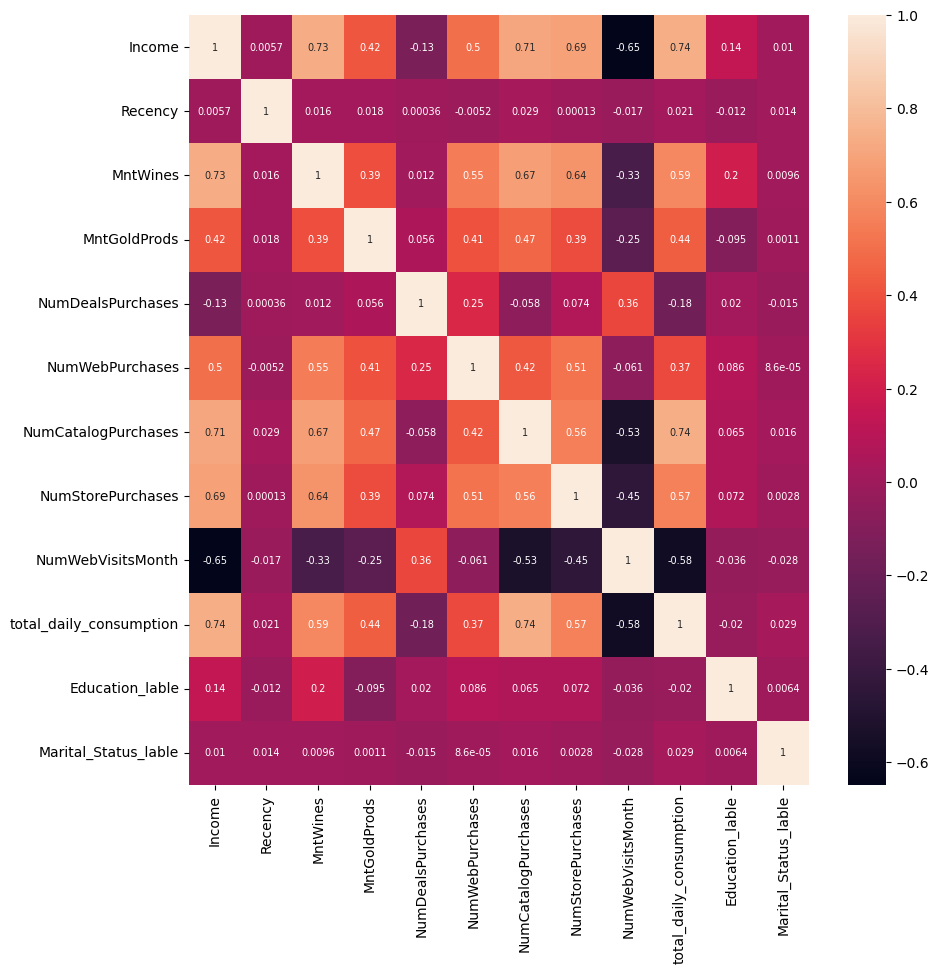

In [59]:
# evaluate the correlation of all

#label encoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the data
label_encoder.fit(df_no_outlier['Education']) 
df_no_outlier['Education_lable'] = label_encoder.transform(df_no_outlier['Education'])

label_encoder.fit(df['Marital_Status']) 
df_no_outlier['Marital_Status_lable'] = label_encoder.transform(df_no_outlier['Marital_Status'])

df_relation = df_no_outlier.drop(columns=["ID", "IncomeGroup", "Year_Birth", "Kidhome", "Teenhome", "Complain", "Education", "Marital_Status", "Dt_Customer", "Response", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Z_CostContact", "Z_Revenue", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts"])


plt.figure(figsize=(10,10))
sns.heatmap(df_relation.corr(), annot=True, annot_kws={"fontsize": 7})


people have high income tend to 
- purchase more wine (0.73)
- make purchase by catalog (0.71)
- make purchase by going to store (0.69)
- purchase mpre daily consumption (0.74)
- not make purchase by visiting web (-0.65)

people purchase more daily consumption tend to make purchase by catalog (0.74)


# Model Traning & Model Evaluation

In [30]:
# split the train_data into features and target
X = df_no_outlier[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]]
y = df_no_outlier["Response"].astype(int).values

from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

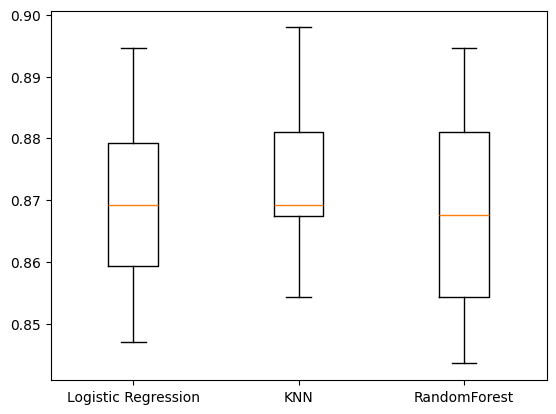

In [32]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "RandomForest": RandomForestClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.8529411764705882
KNN Test Set Accuracy: 0.8506787330316742
RandomForest Test Set Accuracy: 0.8506787330316742


In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_features=6, min_samples_split=2, min_samples_leaf=1)

# Train the model
random_forest.fit(X_train, y_train) #x_train -> array of features; y_train -> array of target var value

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# You can also print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))
#print(predictions)

Accuracy: 0.8506787330316742
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       367
           1       0.74      0.19      0.30        75

    accuracy                           0.85       442
   macro avg       0.80      0.59      0.61       442
weighted avg       0.84      0.85      0.81       442



In [35]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Setup the RandomizedSearchCV instance
random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

# Fit the RandomizedSearchCV instance to the data
random_search.fit(X, y)

# Print the best parameters and the corresponding score
print(f"Best parameters:\n {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Retrieve the best estimator
best_rf = random_search.best_estimator_

Best parameters:
 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.865036231884058


In [36]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_features=6, min_samples_split=2, min_samples_leaf=2)

# Train the model
random_forest.fit(X_train, y_train) #x_train -> array of features; y_train -> array of target var value

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# You can also print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))
#print(predictions)

Accuracy: 0.8506787330316742
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       367
           1       0.74      0.19      0.30        75

    accuracy                           0.85       442
   macro avg       0.80      0.59      0.61       442
weighted avg       0.84      0.85      0.81       442



In [37]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# 選擇一種過採樣方法，例如 RandomOverSampler 或 SMOTE
oversampler = RandomOverSampler(random_state=42)
# 或者使用 SMOTE
# oversampler = SMOTE(random_state=42)

# 對訓練數據進行過採樣
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# 訓練模型使用過採樣後的數據
random_forest.fit(X_train_resampled, y_train_resampled)

# 進行預測
predictions = random_forest.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# 輸出詳細評估報告
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.8257918552036199
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       367
           1       0.49      0.51      0.50        75

    accuracy                           0.83       442
   macro avg       0.69      0.70      0.70       442
weighted avg       0.83      0.83      0.83       442



In [38]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
4,AcceptedCmp5,0.381638
2,AcceptedCmp3,0.255313
0,AcceptedCmp1,0.250298
3,AcceptedCmp4,0.067657
1,AcceptedCmp2,0.045094


- cmp5 is the most effective cmp toward the response
- cmp5, cmp3, cmp1 are more effective cmps

## important insights

### cmp5
- cmp5 is especially effective for people without kids (95.1% without kids)
- cmp5 is especially effective for people without teens (88.3% without teens)
- cmp5 is very effective for the people belong to wealthy income level (94.4%)

### cmp3
- cmp3 is more effective for adult(75.4%)
- In most of the cmp people have no kid is the majority, but cmp3 is especially effective for people have kids
- cmp3 is close to equally effective to four income class, but it's the most effective cmp for lower income class compare to other cmps

### cmp1
- cmp1 is especially effective for people without kids (92.4%)
- cmp1 and cmp5 are especially effective for people have no teens in their home (80% and 88.3%)
- cmp1 is very effective for wealthy income level class (85.2%)



people have high income tend to 
- purchase more wine (0.73)
- make purchase by catalog (0.71)
- make purchase by going to store (0.69)
- purchase mpre daily consumption (0.74)
- not make purchase by visiting web (-0.65)

people purchase more daily consumption tend to make purchase by catalog (0.74)

Most cmps are comparetively effective for richer people (well-off and wealthy), except for cmp3

## Statagies

### cmp5
- We can spend biggest money on promoting cmp5, and mainly focus on wealthy people without kids and teens in their home.
- The contents of the cmp5 can focus on the event related to wine and daily comsuption
- The promotion of cmp5 can be placed on the catalog
- The promotion of cmp5 can be placed in the store rather than the internet

### cmp3 & cmp1
- We can spend equally amount of money on cmp3 and cmp1, but both lesser than cmp5
- for cmp3, we can focus on the adult who has kids in their home
- if we want to expand the market for the people in lower income class, we can start with cmp3

### others
- the statagies for cmp1 is close to cmp5, so this kind of stratagies are very important for this company
- cmp4 and cmp2 are compartively not effective with other cmps, we can spent less efforts on promoting those cmps
